# Подготовили студенты ИУ10-95, Яроц И.В., Ульшин И.А.

О датасете: \
Набор данных состоит из круглых снимков примерно из 700 демонстраций турниров высокого уровня в 2019 и 2020 годах. Раунды разминки и перезапуски были отфильтрованы, а для оставшихся живых раундов снимок раундов записывался каждые 20 секунд до тех пор, пока раунд не был решен. После первоначальной публикации он был предварительно обработан и сглажен, чтобы улучшить читаемость и упростить обработку алгоритмов. Общее количество снимков составляет 122411. Снимки являются i.i.d и должны рассматриваться как отдельные точки данных, а не как часть совпадения.
https://www.kaggle.com/christianlillelund/csgo-round-winner-classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
#Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('csgo_round_snapshots.csv')
df.head(15) #наши данные

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
5,114.97,1.0,0.0,de_dust2,False,500.0,500.0,500.0,0.0,1750.0,10550.0,5.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CT
6,94.97,1.0,0

### Предобработка

In [4]:
c = df.columns

In [5]:
df.drop([c[22], c[30], c[37], c[52], c[58], c[60]], axis = 1, inplace = True)   #удалили поля с неиспользуемым оружием в игре (в лабе 1 и 2 более подробно про предобработку данных расписано) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 91 columns):
time_left                       122410 non-null float64
ct_score                        122410 non-null float64
t_score                         122410 non-null float64
map                             122410 non-null object
bomb_planted                    122410 non-null bool
ct_health                       122410 non-null float64
t_health                        122410 non-null float64
ct_armor                        122410 non-null float64
t_armor                         122410 non-null float64
ct_money                        122410 non-null float64
t_money                         122410 non-null float64
ct_helmets                      122410 non-null float64
t_helmets                       122410 non-null float64
ct_defuse_kits                  122410 non-null float64
ct_players_alive                122410 non-null float64
t_players_alive                 122410 non-null float

In [7]:
# Дальше преобразуем категориальные (2) и булевые (1) данные в числовые для парочки полей (тк значения в признаках отличаются сильно использовать OneHotEncoding не вижу смысла):
encoder = preprocessing.LabelEncoder()

df['map'] = encoder.fit_transform(df['map'])
df['round_winner'] = encoder.fit_transform(df['round_winner'])
df['bomb_planted'] = encoder.fit_transform(df['bomb_planted'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 91 columns):
time_left                       122410 non-null float64
ct_score                        122410 non-null float64
t_score                         122410 non-null float64
map                             122410 non-null int32
bomb_planted                    122410 non-null int64
ct_health                       122410 non-null float64
t_health                        122410 non-null float64
ct_armor                        122410 non-null float64
t_armor                         122410 non-null float64
ct_money                        122410 non-null float64
t_money                         122410 non-null float64
ct_helmets                      122410 non-null float64
t_helmets                       122410 non-null float64
ct_defuse_kits                  122410 non-null float64
ct_players_alive                122410 non-null float64
t_players_alive                 122410 non-null float

In [9]:
y = df['round_winner'] # целевая переменная

In [10]:
X = df.drop('round_winner', axis = 1) # признаки

In [11]:
X.shape

(122410, 90)

Логистическая модель в sklearn реализована в классе LogisticRegression библиотеки linear_model

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l1',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1e4,
    # параметр для остановки поиска решения.(прекращается процесс обучения когда приближаемся к локальному минимому равному переменной tol)
    tol=1e-4,
    # Так как распознается 2 класса. 
    multi_class='ovr'
    )

In [13]:
model.fit(X, y)

LogisticRegression(C=10000.0, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [14]:
preds = model.predict(X) #предсказанные значения

In [15]:
#Матрица ошибок
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y, preds)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,45373,14631
1,16046,46360


Ошибки есть, но в целом оба класса предсказывают неплохо. Есть вариант как-то поиграться еще с предобработкой данных, но пока оставим как есть

In [16]:
pred_prob = model.predict_proba(X) #выдает результат в виде вероятности

In [17]:
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)
#frp - false positive rate (горизонтальная ось)
#tpr (recall) - true positive rate (вертикальная ось)
# каждая точка на графике ROC AUC соответствует выбору некоторого порога (про это ниже)

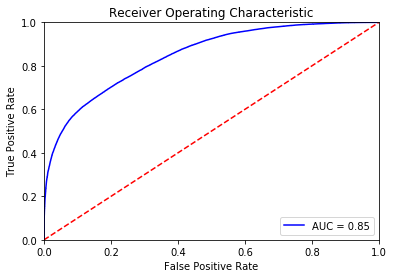

In [18]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Результаты применения L1 и L2

penalty='l2' C=1 AUC = 0.85

penalty='l2' C=1e2 AUC = 0.85

penalty='l2' C=1e4 AUC = 0.84

penalty='l1' C=1 AUC = 0.85

penalty='l1' C=1e2 AUC = 0.85

penalty='l1' C=1e4 AUC = 0.85

переменные tol и multi_class не менялись

In [19]:
#посмотрим на наши признаки
model.coef_

array([[ 1.31793398e-03, -3.81089680e-03,  2.53734619e-03,
        -4.11015955e-02,  1.04266954e+00, -4.90400386e-03,
         3.43338753e-03, -2.90634605e-03,  2.74132407e-03,
        -1.53469811e-05,  1.14506743e-05, -1.08890613e-02,
         1.47480180e-01, -1.56554058e-02, -2.52918609e-01,
         3.77737064e-01, -3.46069950e-01,  4.08898505e-01,
        -4.71794515e-01,  3.50667700e-01, -4.79297368e-01,
         4.65298948e-01,  1.66339153e-01, -9.22922673e-02,
         2.00953531e-01, -2.27416876e-01,  4.60913724e-01,
        -3.92577377e-01,  6.11334912e-01,  4.47930562e-01,
        -5.14716357e-01,  2.98188107e-01,  1.87258215e-01,
         6.22092213e-02,  9.47568097e+00, -3.96336891e-01,
         8.95138014e-01, -4.15263408e-01,  3.36271344e-01,
        -7.53888358e-02,  2.48348614e-01, -3.33955218e-01,
         2.38674302e+00, -3.77483981e-01,  7.45402531e-01,
         1.13291986e-01, -2.11719727e-01, -3.02261440e-01,
         3.56808404e-01, -8.63602931e+00, -6.35201305e-0

In [20]:
len(model.coef_[0])

90

In [21]:
# для наглядности сделаем все в словаре, тк после удаления можем потерять нумерацию столбцов
col = [i for i in range(90)]
listValues = model.coef_[0]
myDict = {col[i]:listValues[i] for i in range(0, len(col), 1)} 
for key in myDict:
    print(key, '->', myDict[key])

0 -> 0.0013179339767680973
1 -> -0.003810896804500837
2 -> 0.002537346192802158
3 -> -0.04110159548493279
4 -> 1.0426695403918413
5 -> -0.0049040038630710665
6 -> 0.003433387526394655
7 -> -0.0029063460508069075
8 -> 0.002741324070193162
9 -> -1.5346981115103377e-05
10 -> 1.1450674328792307e-05
11 -> -0.010889061298171096
12 -> 0.14748018034726543
13 -> -0.01565540583963345
14 -> -0.25291860895872387
15 -> 0.377737064170585
16 -> -0.34606994977074795
17 -> 0.4088985048038459
18 -> -0.47179451538467015
19 -> 0.350667699603542
20 -> -0.47929736805749834
21 -> 0.46529894825911855
22 -> 0.16633915310251096
23 -> -0.09229226730507259
24 -> 0.20095353130221047
25 -> -0.2274168759443776
26 -> 0.46091372354669113
27 -> -0.3925773765543831
28 -> 0.6113349119029725
29 -> 0.4479305619236559
30 -> -0.5147163565715981
31 -> 0.29818810663375744
32 -> 0.1872582153471944
33 -> 0.062209221264656084
34 -> 9.475680968305541
35 -> -0.3963368906836435
36 -> 0.8951380142670397
37 -> -0.4152634083619794
38 -

In [22]:
# если значения признака меньше 0.01 удалим его (считаем их близкими к нулю)
key_new = list()
for key in myDict:
    if myDict[key] < 0.01:
        key_new.append(key)
print(key_new) # номера столбцов которые мы будем удалять для метода ближайших соседей

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 18, 20, 23, 25, 27, 30, 35, 37, 39, 41, 43, 46, 47, 49, 50, 51, 52, 54, 57, 58, 60, 62, 64, 65, 66, 68, 69, 76, 79, 81, 83, 85, 87]


In [23]:
df1 = pd.read_csv('csgo_round_snapshots.csv')

In [24]:
c = df.columns

In [25]:
for i in key_new:
     df1.drop([c[i]], axis = 1, inplace = True)

In [26]:
df1.info()
#видим что некоторые поля не числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 50 columns):
bomb_planted                    122410 non-null bool
t_helmets                       122410 non-null float64
t_players_alive                 122410 non-null float64
t_weapon_ak47                   122410 non-null float64
t_weapon_aug                    122410 non-null float64
t_weapon_awp                    122410 non-null float64
ct_weapon_bizon                 122410 non-null float64
t_weapon_bizon                  122410 non-null float64
t_weapon_cz75auto               122410 non-null float64
t_weapon_elite                  122410 non-null float64
t_weapon_famas                  122410 non-null float64
ct_weapon_g3sg1                 122410 non-null float64
t_weapon_g3sg1                  122410 non-null float64
t_weapon_galilar                122410 non-null float64
ct_weapon_glock                 122410 non-null float64
t_weapon_glock                  122410 non-null floa

In [27]:
#преобразуем их
df1['round_winner'] = encoder.fit_transform(df['round_winner'])
df1['bomb_planted'] = encoder.fit_transform(df['bomb_planted'])

In [28]:
y = df1['round_winner'] # целевая переменная
X = df1.drop('round_winner', axis = 1) # признаки
X.shape

(122410, 49)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
# импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier

# создадим наш классификатор
clf = KNeighborsClassifier(n_neighbors=3)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
clf.score(X_test, y_test)

0.7500571839362155